In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
# Load data
D = pd.read_csv("Downloads\\diabetes.csv")
D.shape

(768, 9)

In [3]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
D.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
D.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
D.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
#Statistical Analysis
from scipy.stats import mode, skew, kurtosis
numerical_columns = D.select_dtypes(include=['int64', 'float64']).drop('Outcome', axis=1)
# Calculate mean
mean_values = numerical_columns.mean()
# Calculate median
median_values = numerical_columns.median()
# Calculate mode
mode_values = numerical_columns.mode().iloc[0] 
# Calculate variance
variance_values = numerical_columns.var()
# Calculate range
range_values = numerical_columns.max() - numerical_columns.min()
# Calculate skewness
skewness_values = numerical_columns.apply(skew)
# Calculate kurtosis
kurtosis_values = numerical_columns.apply(kurtosis)

# Create a DataFrame to display the results
summary_df = pd.DataFrame({
'Mean': mean_values, 
'Median': median_values, 
'Mode': mode_values, 
'Variance': variance_values, 
'Range': range_values, 
'Skewness': skewness_values, 'Kurtosis': kurtosis_values
})
print(summary_df)

                                Mean    Median    Mode      Variance    Range  \
Pregnancies                 3.845052    3.0000   1.000     11.354056   17.000   
Glucose                   120.894531  117.0000  99.000   1022.248314  199.000   
BloodPressure              69.105469   72.0000  70.000    374.647271  122.000   
SkinThickness              20.536458   23.0000   0.000    254.473245   99.000   
Insulin                    79.799479   30.5000   0.000  13281.180078  846.000   
BMI                        31.992578   32.0000  32.000     62.159984   67.100   
DiabetesPedigreeFunction    0.471876    0.3725   0.254      0.109779    2.342   
Age                        33.240885   29.0000  22.000    138.303046   60.000   

                          Skewness  Kurtosis  
Pregnancies               0.899912  0.150383  
Glucose                   0.173414  0.628813  
BloodPressure            -1.840005  5.138691  
SkinThickness             0.109159 -0.524494  
Insulin                   2.267810 

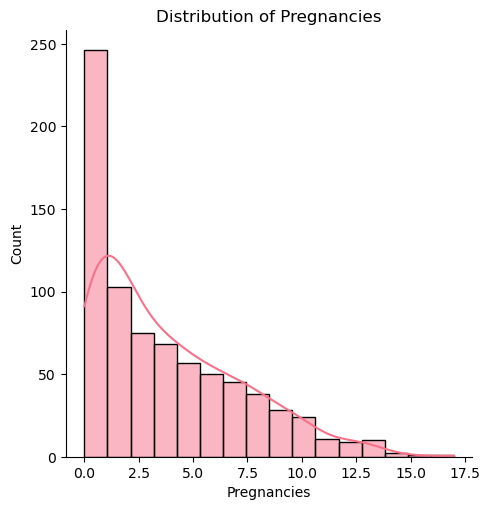

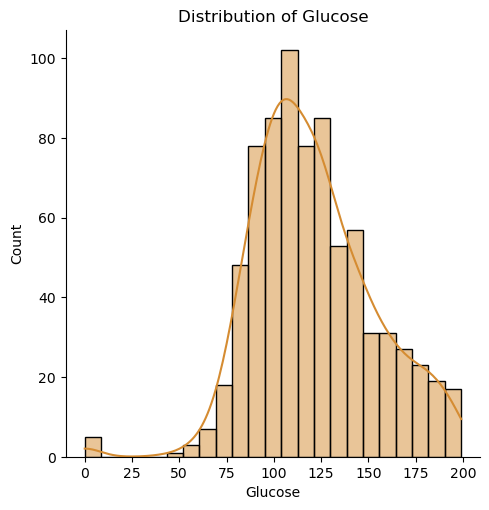

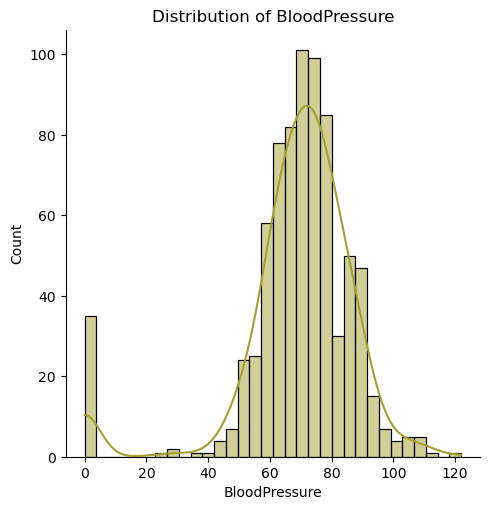

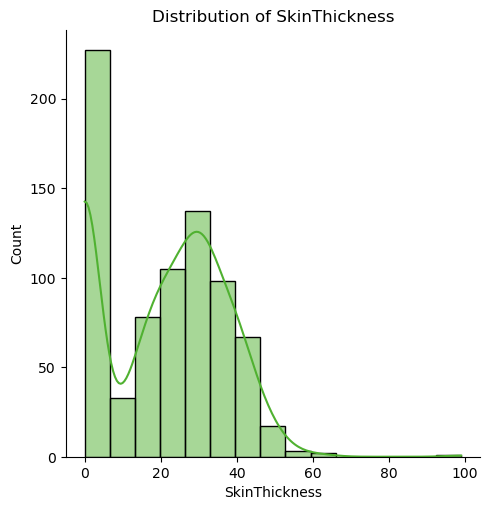

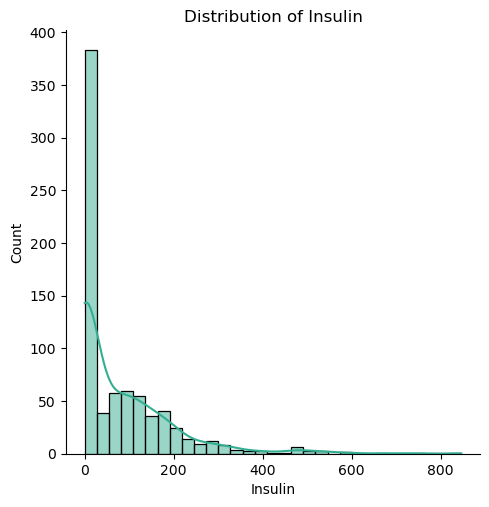

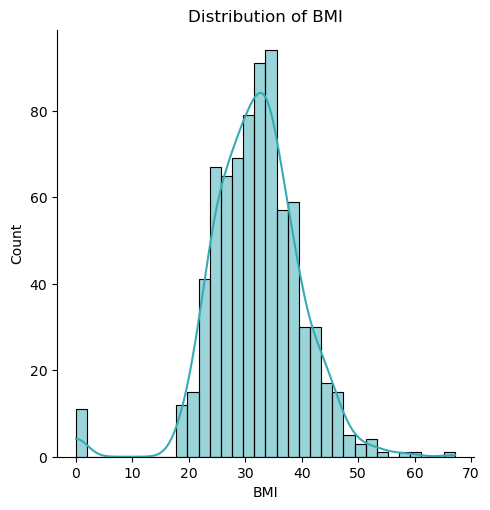

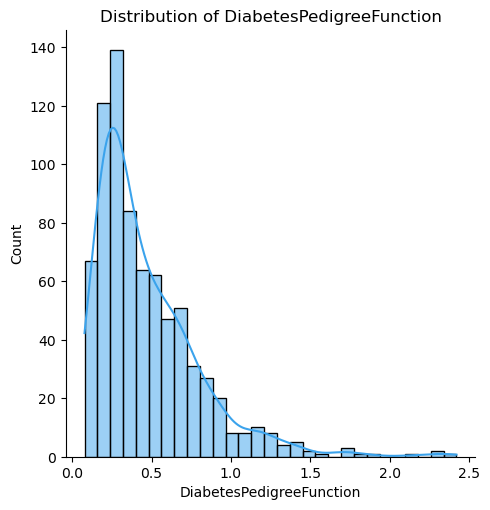

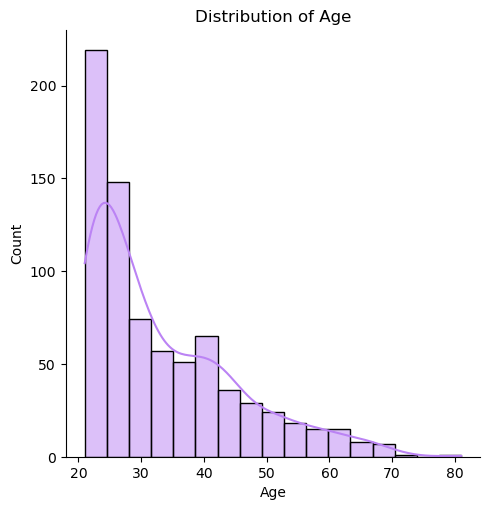

In [8]:
# Distribution plots
palette = sns.color_palette('husl', n_colors=len(D.select_dtypes(include=['float64','int64']).columns))
# Plot distplots for all numerical columns except the last one 
numerical_columns = D.select_dtypes(include=['float64','int64']).columns[:-1]
for i, column in enumerate(numerical_columns):
    sns.displot(D[column], kde=True, color=palette[i])
    plt.title(f'Distribution of {column}') 
    plt.show()

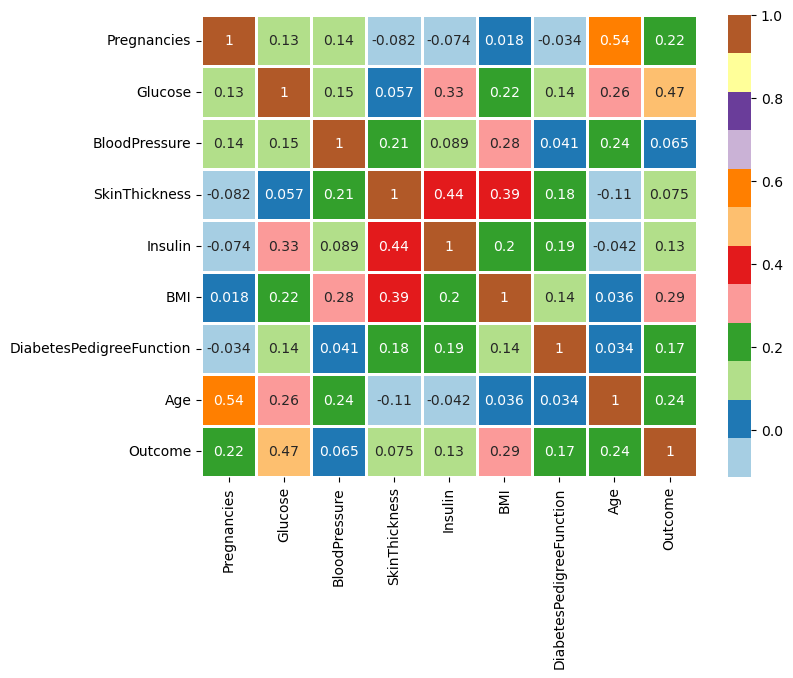

In [9]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(D.corr(),annot=True,cmap="Paired",linewidths=1) 
plt.show()

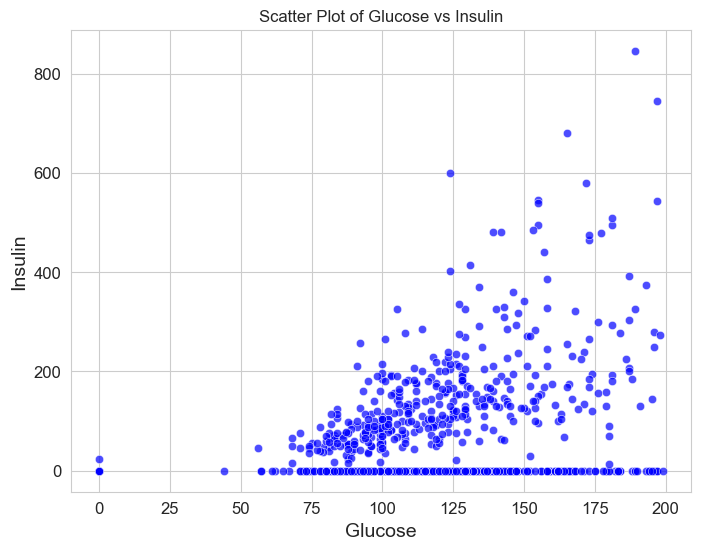

<Figure size 800x600 with 0 Axes>

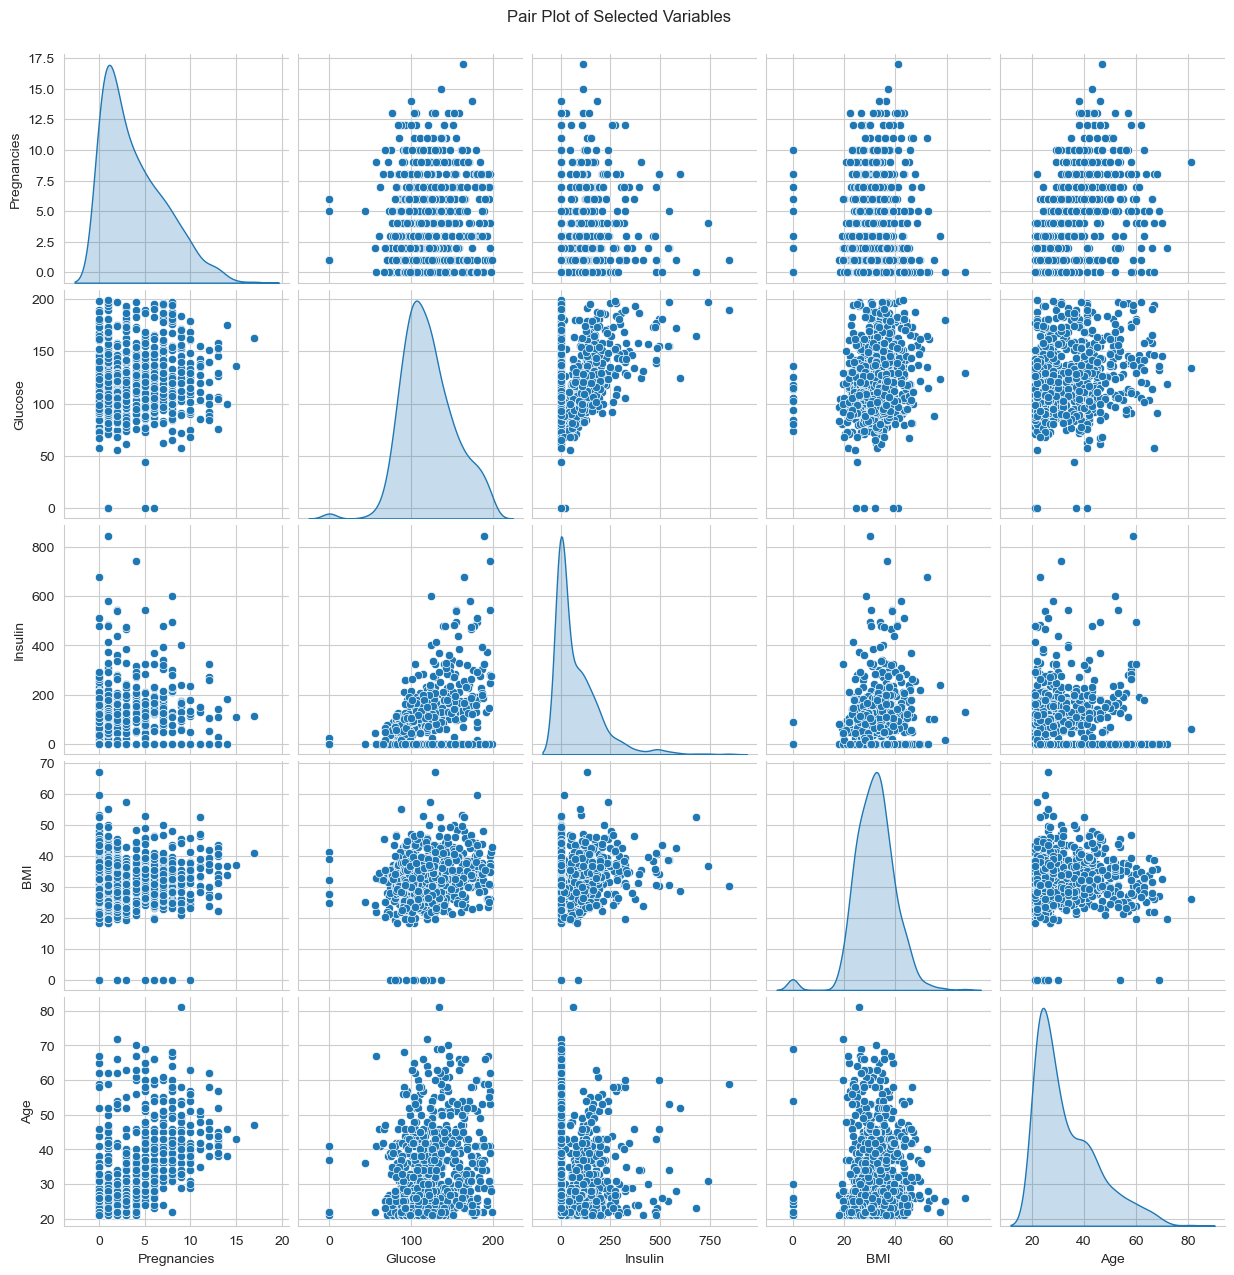

<Figure size 800x600 with 0 Axes>

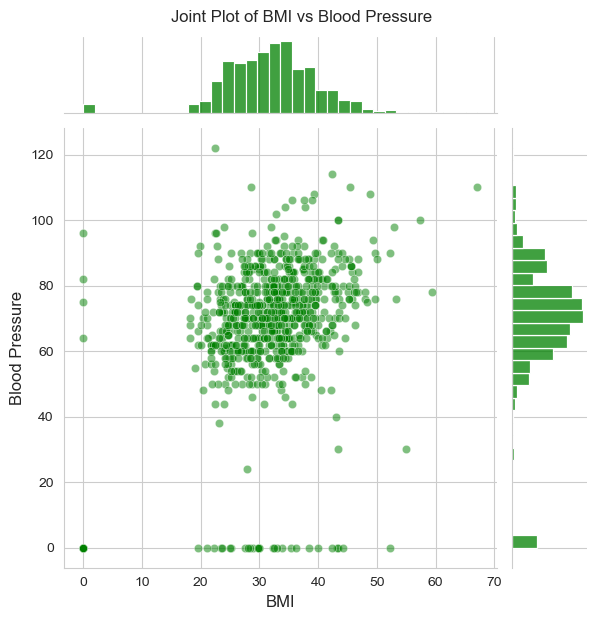

<Figure size 800x600 with 0 Axes>

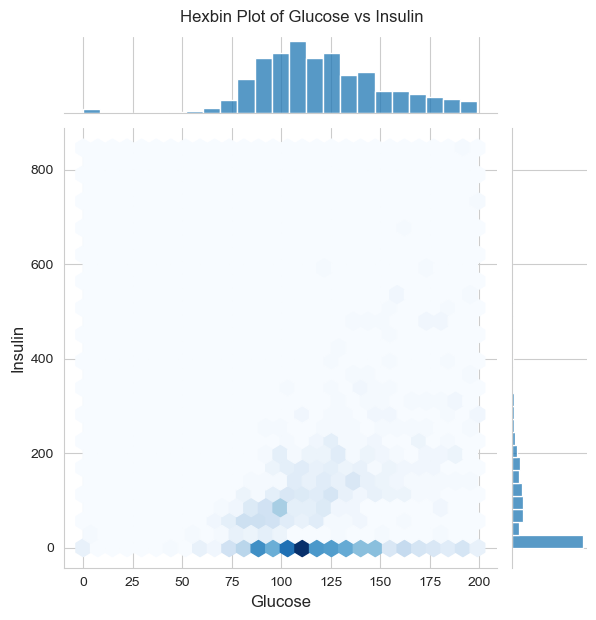

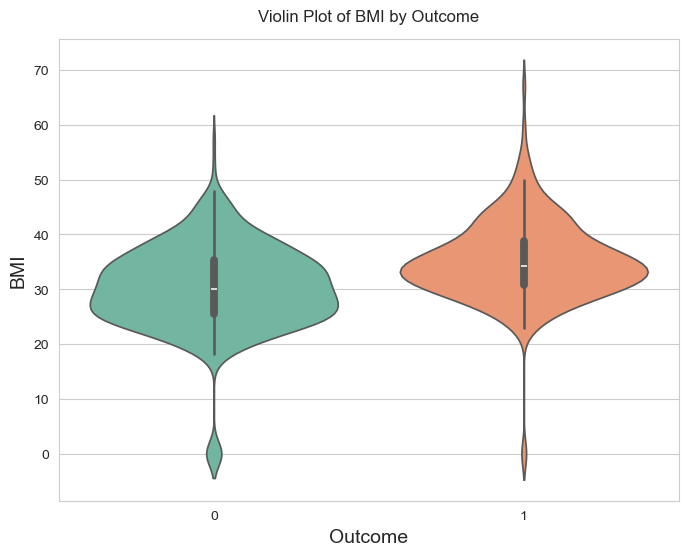

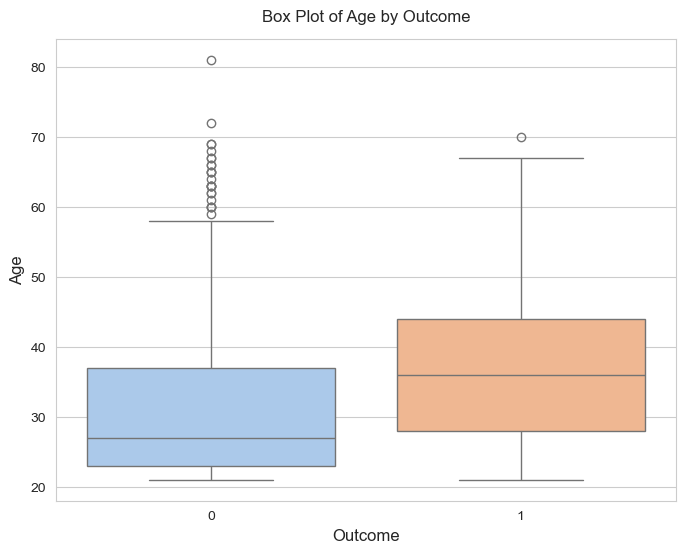

In [10]:
sns.set_style("whitegrid")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=D, color='blue', alpha=0.7) 
plt.title('Scatter Plot of Glucose vs Insulin', fontsize=12) 
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pair plot
plt.figure(figsize=(8, 6))
pairplot = sns.pairplot(D[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']], diag_kind='kde')
pairplot.fig.suptitle('Pair Plot of Selected Variables', fontsize=12, y=1.02)
plt.show()

# Joint plot
plt.figure(figsize=(8, 6))
jointplot = sns.jointplot(x='BMI', y='BloodPressure', data=D, kind='scatter', color='green', alpha=0.5)
jointplot.set_axis_labels('BMI', 'Blood Pressure', fontsize=12)
jointplot.fig.suptitle('Joint Plot of BMI vs Blood Pressure', fontsize=12, y=1.02) 
plt.show()

# Hexbin plot
plt.figure(figsize=(8, 6))
hexbinplot = sns.jointplot(x='Glucose', y='Insulin', data=D, kind='hex', cmap='Blues')
hexbinplot.set_axis_labels('Glucose', 'Insulin', fontsize=12)
hexbinplot.fig.suptitle('Hexbin Plot of Glucose vs Insulin', fontsize=12, y=1.02) 
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
violinplot = sns.violinplot(x='Outcome', y='BMI', hue='Outcome', data=D, palette='Set2', legend=False) 
violinplot.set_title('Violin Plot of BMI by Outcome', fontsize=12, y=1.02) 
violinplot.set_xlabel('Outcome', fontsize=14)
violinplot.set_ylabel('BMI', fontsize=14)
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='Outcome', y='Age', hue='Outcome', data=D, palette='pastel', legend=False)
boxplot.set_title('Box Plot of Age by Outcome', fontsize=12, y=1.02)
boxplot.set_xlabel('Outcome', fontsize=12)
boxplot.set_ylabel('Age', fontsize=12)
plt.show()

In [11]:
D.duplicated().sum()

0

In [12]:
D.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

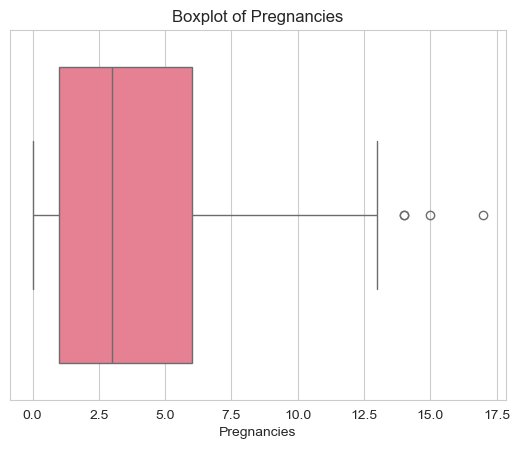

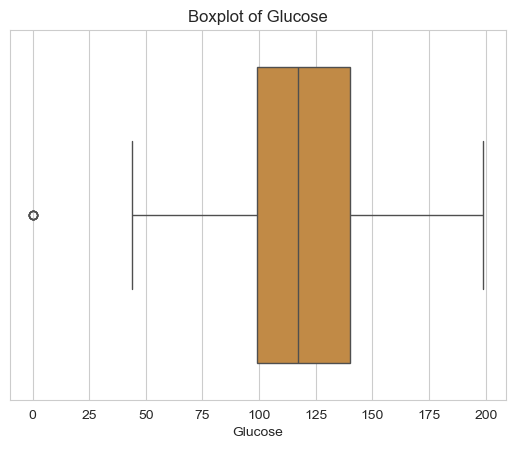

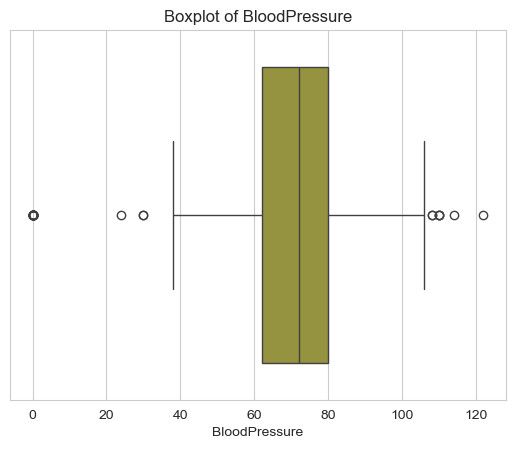

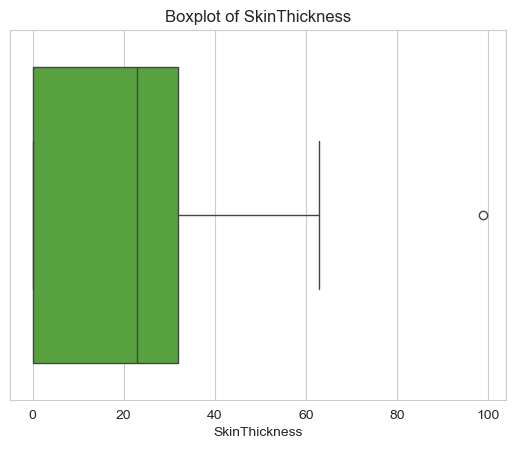

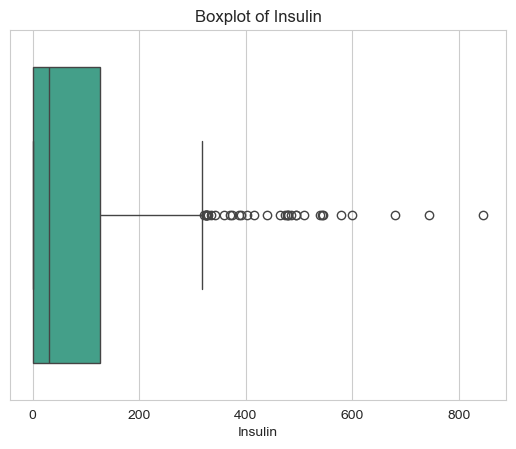

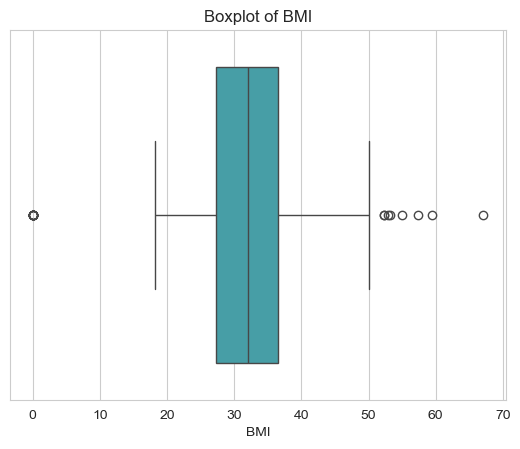

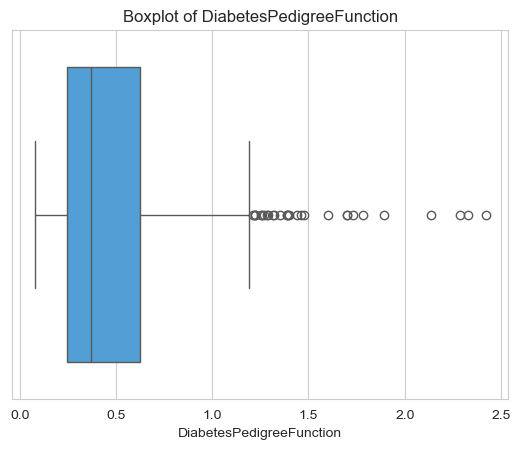

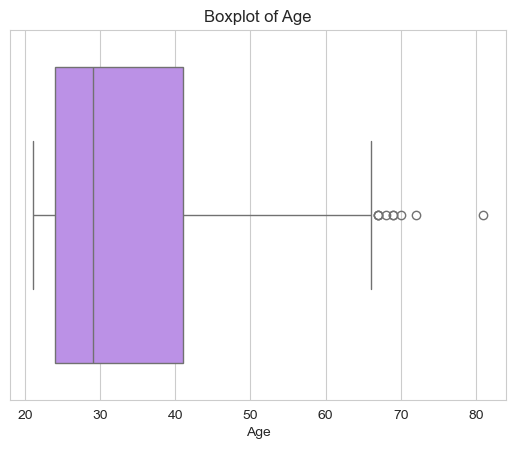

In [13]:
# Outliers
for i, column in enumerate(numerical_columns): 
    sns.boxplot(x=D[column], color=palette[i]) 
    plt.title(f'Boxplot of {column}')
    plt.show()

In [14]:
# Outliers treatment
from feature_engine.outliers import Winsorizer

# Create a Winsorizer instance
w = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=list(D.columns))

# Apply Winsorization
D = w.fit_transform(D)

In [15]:
# cube root transformation
D['Pregnancies'] = np.cbrt(D['Pregnancies'])
D['DiabetesPedigreeFunction'] = np.cbrt(D['DiabetesPedigreeFunction']) 
D['Insulin'] = np.cbrt(D['Insulin'])

In [16]:
# Splitting data from Model training
from sklearn.preprocessing import MinMaxScaler
X = D.drop('Outcome', axis=1)
y = D['Outcome']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[0.76314283, 0.68494208, 0.51388889, ..., 0.54435484, 0.6745956 ,
        0.63736264],
       [0.41997368, 0.2957529 , 0.43055556, ..., 0.3561828 , 0.43773644,
        0.21978022],
       [0.83994737, 0.9011583 , 0.40277778, ..., 0.26747312, 0.70607981,
        0.24175824],
       ...,
       [0.7181449 , 0.51814672, 0.51388889, ..., 0.34543011, 0.31235267,
        0.1978022 ],
       [0.41997368, 0.54903475, 0.34722222, ..., 0.45026882, 0.43562382,
        0.57142857],
       [0.41997368, 0.34517375, 0.48611111, ..., 0.45833333, 0.39840455,
        0.04395604]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Regression Models 
regression_models = {
"Linear Regression": LinearRegression(), 
"Ridge Regression": Ridge(),
"Lasso Regression": Lasso()
}
for name, model in regression_models.items():
    model.fit(X_train, y_train)

In [20]:
# Decision Models 
decision_models = {
"Decision Tree": DecisionTreeClassifier(), 
"Random Forest": RandomForestClassifier(), 
"Gradient Boosting": GradientBoostingClassifier()
}
for name, model in decision_models.items():
    model.fit(X_train, y_train)

In [21]:
# MAE,MSE,R-squared calculations
for name, model in regression_models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}") 
    print(f"MSE: {mean_squared_error(y_test, y_pred)}") 
    print(f"R-squared: {r2_score(y_test, y_pred)}") 
    print()

Linear Regression:
MAE: 0.34805336561120936
MSE: 0.17492573794028538
R-squared: 0.23810123030453456

Ridge Regression:
MAE: 0.35011504873139854
MSE: 0.1744391474440871
R-squared: 0.2402206022435316

Lasso Regression:
MAE: 0.4562587249883667
MSE: 0.2296966394489976
R-squared: -0.00045647404452320295



In [22]:
# Confusion Matrix
for name, model in decision_models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}") 
    print(f"Confusion Matrix:") 
    print(confusion_matrix(y_test, y_pred))
    print()

Decision Tree:
Accuracy: 0.7272727272727273
Confusion Matrix:
[[75 24]
 [18 37]]

Random Forest:
Accuracy: 0.7402597402597403
Confusion Matrix:
[[78 21]
 [19 36]]

Gradient Boosting:
Accuracy: 0.7467532467532467
Confusion Matrix:
[[77 22]
 [17 38]]

